# Clone Git

In [1]:
!git clone https://github.com/georgie-talukdar/Can-you-judge-a-book-by-its-cover.git


Cloning into 'Can-you-judge-a-book-by-its-cover'...
remote: Enumerating objects: 8534, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8534 (delta 0), reused 3 (delta 0), pack-reused 8530
Receiving objects: 100% (8534/8534), 282.27 MiB | 32.69 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (8533/8533), done.


#Imports

In [5]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import ast


# Load Images and labels

In [50]:
folder_path = '/content/Can-you-judge-a-book-by-its-cover/Data/All_covers'

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    num_images = len([filename for filename in os.listdir(subfolder_path) if not os.path.isdir(os.path.join(subfolder_path, filename))])
    print(f"{subfolder}: {num_images} images")


covers_7: 999 images
covers_8: 999 images
covers_3: 999 images
covers_6: 999 images
covers_2: 999 images
covers_1: 999 images
covers_4: 999 images
covers_5: 999 images
covers_9: 535 images


In [51]:
folder_path = '/content/Can-you-judge-a-book-by-its-cover/Data/All_covers'
covers = []  # List to store (image, label) tuples

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    for filename in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, filename)
        if os.path.isdir(file_path):
            continue
        img = Image.open(file_path)
        label = os.path.splitext(filename)[0]  # remove the extension from the filename
        covers.append((img, label))  # Append tuple to the data list


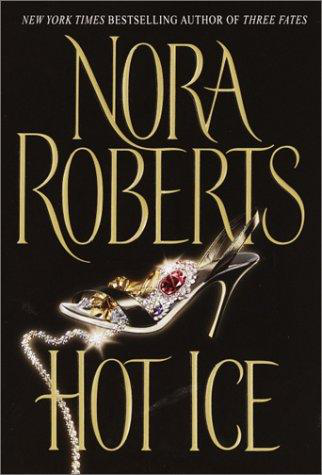

Cover Id: 227158


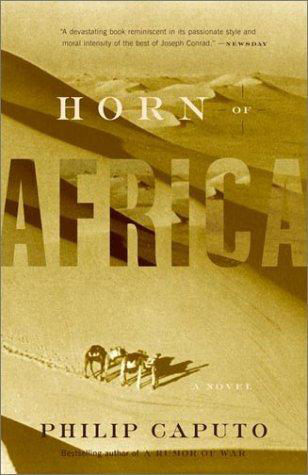

Cover Id: 229544


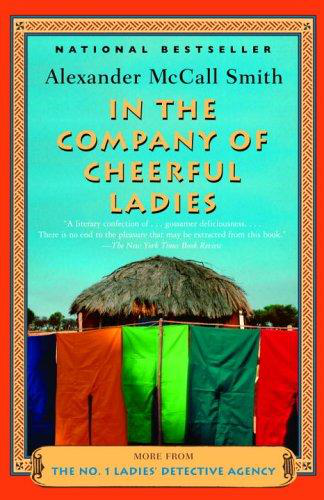

Cover Id: 415574


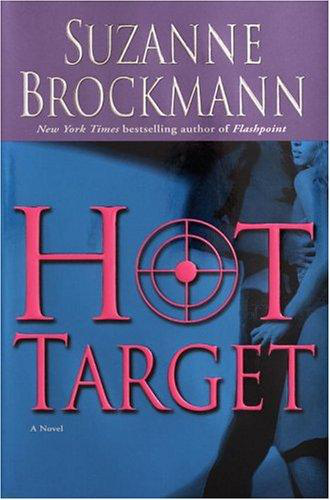

Cover Id: 211338


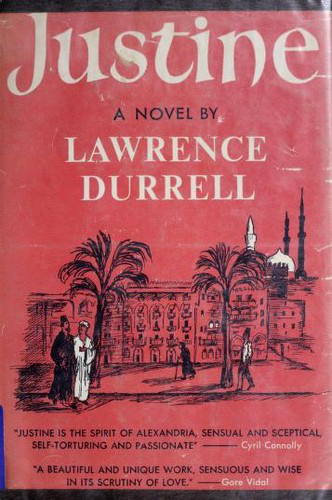

Cover Id: 8260630


In [53]:
#first 5 images and labels
for i, (img, label) in enumerate(covers[:5]):
    img.show()
    print("Cover Id:", label)

# Cover Meta data

## Load meta data

In [9]:
csv_path = '/content/Can-you-judge-a-book-by-its-cover/Data/cover_and_genres'
df = pd.read_csv(csv_path)


In [10]:
# Load cover ids to check against meta data 
folder_path = '/content/Can-you-judge-a-book-by-its-cover/Data/All_covers'
labels = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    for filename in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, filename)
        if os.path.isdir(file_path):
            continue
        label = os.path.splitext(filename)[0]  # remove the extension from the filename
        labels.append(label)


## Remove duplicate data

In [11]:
df = df[~df.duplicated(subset='Cover', keep='first')]

In [12]:
# remove rows from dataframe that do not have a corresponding cover
my_list = np.array(labels, dtype=np.int64).tolist()
df = df[df['Cover'].isin(my_list)]

## Genres

In [13]:
all_subjects = []
for subjects in df['Subjects']:
    all_subjects.extend(subjects)


In [14]:
# output a list of lists, with each inner list containing the strings for each row
df['Subjects'] = df['Subjects'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [15]:
df.head(5)

Title                  ID    Cover  \
0  H IS FOR HOMICIDE  /works/OL14852185W   579109   
1  H IS FOR HOMICIDE  /works/OL14852185W  3108161   
2  H IS FOR HOMICIDE  /works/OL14852185W   226697   
3  I IS FOR INNOCENT  /works/OL14852192W   579110   
4   G IS FOR GUMSHOE  /works/OL14852180W   579057   

                                            Subjects  
0  [Detective and mystery stories, Women private ...  
1  [Detective and mystery stories, Women private ...  
2  [Detective and mystery stories, Women private ...  
3  [Fiction, Kinsey Millhone (Fictitious characte...  
4  [Women detectives, Open Library Staff Picks, W...

In [16]:
#!pip install fpdf

In [17]:
'''from collections import Counter
from fpdf import FPDF

# Combine all lists in the column into a single list
subjects_list = [item for sublist in df['Subjects'] for item in sublist]

# Count the occurrences of each element in the list
subject_counts = Counter(subjects_list)

# Get the top 20 most common subjects
top_subjects = subject_counts.most_common(300)

pdf = FPDF()
pdf.set_font("Arial", size=12)
pdf.add_page()

# Write the top subjects and counts to the PDF
for subject, count in top_subjects:
    pdf.cell(0, 10, txt=f"{subject}: {count}", ln=True)

# Save the PDF file
pdf.output("subject_counts.pdf")'''

'from collections import Counter\nfrom fpdf import FPDF\n\n# Combine all lists in the column into a single list\nsubjects_list = [item for sublist in df[\'Subjects\'] for item in sublist]\n\n# Count the occurrences of each element in the list\nsubject_counts = Counter(subjects_list)\n\n# Get the top 20 most common subjects\ntop_subjects = subject_counts.most_common(300)\n\npdf = FPDF()\npdf.set_font("Arial", size=12)\npdf.add_page()\n\n# Write the top subjects and counts to the PDF\nfor subject, count in top_subjects:\n    pdf.cell(0, 10, txt=f"{subject}: {count}", ln=True)\n\n# Save the PDF file\npdf.output("subject_counts.pdf")'

In [18]:
genre_dict = {
    'fantasy': 'Fantasy',
    'vampires': 'Fantasy',
    'adventure': 'Action and Adventure',
    'action': 'Action and Adventure',
    'romance': 'Romance',
    'love': 'Romance',
    'contemporary': 'Contemporary',
    'dystopian': 'Dystopian',
    'espionage': 'Espionage',
    'mystery': 'Mystery and Detective',
    'detective': 'Mystery and Detective',
    'investigation': 'Mystery and Detective',
    'investigators': 'Mystery and Detective',
    'horror': 'Horror',
    'thriller': 'Thriller',
    'thrillers': 'Thriller',
    'psychological': 'Psychological',
    'paranormal': 'Paranormal',
    'crime': 'Crime',
    'homicide': 'Crime',
    'missing persons': 'Crime',
    'police': 'Crime',
    'kidnapping': 'Crime',
    'terrorism': 'Crime',
    'murder': 'Murder',
    'murders': 'Murder',
    'murderers': 'Murder',
    'suspense': 'Suspense',
    'historical fiction': 'Historical Fiction',
    'science Fiction': 'Science Fiction',
    'children’s': 'Children',
    'children': 'Children',
    'memoir': 'Memoir',
    'art': 'Art',
    'self-help': 'Self-help',
    'health': 'Health',
    'history': 'Historical',
    'historical': 'Historical',
    'travel': 'Travel',
    'political': 'Political',
    'animals': 'Animals',
    'women': 'Women',
    'fiction': 'Fiction',
    'family': 'Family',
    'families': 'Family',
    'sisters': 'Family',
    'brothers': 'Family',
    'fathers and daughters': 'Family',
    'relationships': 'Relationships',
    'relations': 'Relationships',
    'friendship': 'Friendship',
    'war': 'War',
    'legal': 'Legal',
    'humor': 'Humor',
    'humorous': 'Humor',
    'death': 'Death'
}

processed_data = []

for _, row in df.iterrows():
    subjects = row['Subjects']
    genres = []

    for subject in subjects:
        words = subject.split()
        for word in words:
            lowercase_word = word.lower()
            if lowercase_word in genre_dict:
                genres.append(genre_dict[lowercase_word])

    genres_str = ', '.join(set(genres))  # Join genres with comma separator
    processed_data.append(genres_str)

df['Genres'] = processed_data


In [19]:
df = df.drop(['Subjects'], axis=1)

In [20]:
df['Genres'] = df['Genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])

In [21]:
# Create dummy variables for the genres
dummy_genres = pd.get_dummies(df['Genres'].apply(pd.Series).stack()).groupby(level=0).sum()

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_genres], axis=1)


In [22]:
df.head(10)

Title                  ID     Cover  \
0   H IS FOR HOMICIDE  /works/OL14852185W    579109   
1   H IS FOR HOMICIDE  /works/OL14852185W   3108161   
2   H IS FOR HOMICIDE  /works/OL14852185W    226697   
3   I IS FOR INNOCENT  /works/OL14852192W    579110   
4    G IS FOR GUMSHOE  /works/OL14852180W    579057   
5      A DOGS JOURNEY  /works/OL16499116W  12726463   
6      CHANGING FACES     /works/OL72056W     35784   
7               CHAOS  /works/OL21600250W  12629793   
8  CHAPTERHOUSE: DUNE    /works/OL893508W   5536140   
9  CHAPTERHOUSE: DUNE    /works/OL893508W   1009425   

                                              Genres     Action and Adventure  \
0            [Women, Mystery and Detective, Fiction]  0                     0   
1            [Women, Mystery and Detective, Fiction]  0                     0   
2            [Women, Mystery and Detective, Fiction]  0                     0   
3            [Fiction, Women, Mystery and Detective]  0                     0   
4            [Women, Mystery and Detective, Fiction]  0                     0   
5                   [Fiction, Relationships, Family]  0                     0   
6        [Friendship, Women, Psychological, Fiction]  0                     0   
7  [Thriller, Suspense, Fiction, Women, Mystery a...  0                     0   
8                    [Fiction, Action and Adventure]  0                     1   
9                    [Fiction, Action and Adventure]  0                     1   

   Animals  Art  Children  Contemporary  ...  Political  Psychological  \
0        0    0         0             0  ...          0              0   
1        0    0         0             0  ...          0              0   
2        0    0         0             0  ...          0              0   
3        0    0         0             0  ...          0              0   
4        0    0         0             0  ...          0              0   
5        0    0         0             0  ...          0              0   
6        0    0         0             0  ...          0              1   
7        0    0         0             0  ...          0              0   
8        0    0         0             0  ...          0              0   
9        0    0         0             0  ...          0              0   

   Relationships  Romance  Self-help  Suspense  Thriller  Travel  War  Women  
0              0        0          0         0         0       0    0      1  
1              0        0          0         0         0       0    0      1  
2              0        0          0         0         0       0    0      1  
3              0        0          0         0         0       0    0      1  
4              0        0          0         0         0       0    0      1  
5              1        0          0         0         0       0    0      0  
6              0        0          0         0         0       0    0      1  
7              0        0          0         1         1       0    0      1  
8              0        0          0         0         0       0    0      0  
9              0        0          0         0         0       0    0      0  

[10 rows x 37 columns]

# NYT Data

In [23]:
nyt_titles = pd.read_csv('https://raw.githubusercontent.com/georgie-talukdar/Can-you-judge-a-book-by-its-cover/main/Data/nyt_titles.tsv', sep='\t')

In [24]:
# Remove quotation marks in the the dataframe
nyt_titles = nyt_titles.replace("'", "", regex=True)
nyt_titles = nyt_titles.replace('"', '', regex=True)

In [25]:
nyt_titles.head()

id              title                author  year  total_weeks  \
0     0  H IS FOR HOMICIDE           Sue Grafton  1991           15   
1     1  I IS FOR INNOCENT           Sue Grafton  1992           11   
2    10   G IS FOR GUMSHOE           Sue Grafton  1990            6   
3   100     A DOGS JOURNEY      W. Bruce Cameron  2012            1   
4  1000     CHANGING FACES  Kimberla Lawson Roby  2006            1   

   first_week  debut_rank  best_rank  
0  1991-05-05          15          2  
1  1992-04-26           2          2  
2  1990-05-06           8          8  
3  2012-05-27          14         14  
4  2006-02-19          14         14

In [37]:
# Merge dataframes on different column names
merged_df = pd.merge(df, nyt_titles, left_on="Title", right_on="title", how="left")

In [38]:
merged_df.head()

Title                  ID    Cover  \
0  H IS FOR HOMICIDE  /works/OL14852185W   579109   
1  H IS FOR HOMICIDE  /works/OL14852185W  3108161   
2  H IS FOR HOMICIDE  /works/OL14852185W   226697   
3  I IS FOR INNOCENT  /works/OL14852192W   579110   
4   G IS FOR GUMSHOE  /works/OL14852180W   579057   

                                    Genres     Action and Adventure  Animals  \
0  [Women, Mystery and Detective, Fiction]  0                     0        0   
1  [Women, Mystery and Detective, Fiction]  0                     0        0   
2  [Women, Mystery and Detective, Fiction]  0                     0        0   
3  [Fiction, Women, Mystery and Detective]  0                     0        0   
4  [Women, Mystery and Detective, Fiction]  0                     0        0   

   Art  Children  Contemporary  ...  War  Women  id              title  \
0    0         0             0  ...    0      1   0  H IS FOR HOMICIDE   
1    0         0             0  ...    0      1   0  H IS FOR HOMICIDE   
2    0         0             0  ...    0      1   0  H IS FOR HOMICIDE   
3    0         0             0  ...    0      1   1  I IS FOR INNOCENT   
4    0         0             0  ...    0      1  10   G IS FOR GUMSHOE   

        author  year  total_weeks  first_week  debut_rank  best_rank  
0  Sue Grafton  1991           15  1991-05-05          15          2  
1  Sue Grafton  1991           15  1991-05-05          15          2  
2  Sue Grafton  1991           15  1991-05-05          15          2  
3  Sue Grafton  1992           11  1992-04-26           2          2  
4  Sue Grafton  1990            6  1990-05-06           8          8  

[5 rows x 45 columns]

In [39]:
column_names = merged_df.columns.tolist()
print(column_names)

['Title', 'ID', 'Cover', 'Genres', '', 'Action and Adventure', 'Animals', 'Art', 'Children', 'Contemporary', 'Crime', 'Death', 'Dystopian', 'Espionage', 'Family', 'Fantasy', 'Fiction', 'Friendship', 'Health', 'Historical', 'Horror', 'Humor', 'Legal', 'Memoir', 'Murder', 'Mystery and Detective', 'Paranormal', 'Political', 'Psychological', 'Relationships', 'Romance', 'Self-help', 'Suspense', 'Thriller', 'Travel', 'War', 'Women', 'id', 'title', 'author', 'year', 'total_weeks', 'first_week', 'debut_rank', 'best_rank']


In [40]:
merged_df.drop('title', axis=1, inplace=True)
merged_df.drop('id', axis=1, inplace=True)
merged_df.drop('', axis=1, inplace=True)

In [41]:
merged_df.head()

Title                  ID    Cover  \
0  H IS FOR HOMICIDE  /works/OL14852185W   579109   
1  H IS FOR HOMICIDE  /works/OL14852185W  3108161   
2  H IS FOR HOMICIDE  /works/OL14852185W   226697   
3  I IS FOR INNOCENT  /works/OL14852192W   579110   
4   G IS FOR GUMSHOE  /works/OL14852180W   579057   

                                    Genres  Action and Adventure  Animals  \
0  [Women, Mystery and Detective, Fiction]                     0        0   
1  [Women, Mystery and Detective, Fiction]                     0        0   
2  [Women, Mystery and Detective, Fiction]                     0        0   
3  [Fiction, Women, Mystery and Detective]                     0        0   
4  [Women, Mystery and Detective, Fiction]                     0        0   

   Art  Children  Contemporary  Crime  ...  Thriller  Travel  War  Women  \
0    0         0             0      0  ...         0       0    0      1   
1    0         0             0      0  ...         0       0    0      1   
2    0         0             0      0  ...         0       0    0      1   
3    0         0             0      0  ...         0       0    0      1   
4    0         0             0      0  ...         0       0    0      1   

        author  year  total_weeks  first_week  debut_rank  best_rank  
0  Sue Grafton  1991           15  1991-05-05          15          2  
1  Sue Grafton  1991           15  1991-05-05          15          2  
2  Sue Grafton  1991           15  1991-05-05          15          2  
3  Sue Grafton  1992           11  1992-04-26           2          2  
4  Sue Grafton  1990            6  1990-05-06           8          8  

[5 rows x 42 columns]

In [ ]:
!pip install pandas-profiling==3.5.0

In [44]:
from pandas_profiling import ProfileReport

In [45]:
prof_merged = ProfileReport(merged_df)
prof_merged.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Export Merged Dataframe

In [46]:
merged_df.to_csv('merged_df.csv', index=False)